# Task
Perform sentiment analysis on the movie reviews in the "tmdb_5000_movies.csv" dataset, aiming for a model accuracy of over 80%. Provide the code in separate cells, with comments explaining each step in simple English.

## Load the dataset

### Subtask:
Load the `tmdb_5000_movies.csv` dataset into a pandas DataFrame.


**Reasoning**:
Import the pandas library and load the dataset into a DataFrame, then display the first few rows.



In [ ]:
import pandas as pd

df = pd.read_csv('tmdb_5000_movies.csv')
display(df.head())

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## Explore the data

### Subtask:
Examine the structure and content of the dataset to identify relevant columns for sentiment analysis.


**Reasoning**:
Display the column names, data types, shape, first 5 rows, descriptive statistics, and missing value counts to understand the dataset's structure and content.



In [ ]:
# Display column names and their data types
print("Column names and data types:")
display(df.info())

# Display the number of rows and columns
print("\nShape of the DataFrame (rows, columns):")
display(df.shape)

# Display the first 5 rows
print("\nFirst 5 rows of the DataFrame:")
display(df.head())

# Display summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
display(df.describe())

# Check for missing values and display the count per column
print("\nMissing values per column:")
display(df.isnull().sum())

Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   objec

None


Shape of the DataFrame (rows, columns):


(4803, 20)


First 5 rows of the DataFrame:


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124



Summary statistics for numerical columns:


,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000



Missing values per column:


,0
budget,0
genres,0
homepage,3091
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0
production_companies,0


## Preprocess the text data

### Subtask:
Clean and prepare the text data for analysis, including steps like removing punctuation, converting to lowercase, tokenization, and removing stop words.


**Reasoning**:
Handle missing values, create a combined text column, define and apply a preprocessing function, and display the results.



**Reasoning**:
The previous command failed because the NLTK 'punkt' and 'stopwords' resources were not found and the exception handling for `nltk.downloader.DownloadError` was incorrect. The NLTK resources need to be downloaded first.



**Reasoning**:
The previous command failed because `punkt_tab` was not found. Although the instructions only explicitly mentioned downloading `punkt` and `stopwords`, the `word_tokenize` function seems to require `punkt_tab`. I will download `punkt_tab` and try again.



In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('punkt_tab', quiet=True) # Download punkt_tab

# 1. Handle missing values
df['overview'] = df['overview'].fillna('')
df['tagline'] = df['tagline'].fillna('')

# 2. Create a new column by concatenating 'overview' and 'tagline'
df['combined_text'] = df['overview'] + ' ' + df['tagline']

# 3. Define a function to preprocess the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# 4. Apply the preprocessing function to the 'combined_text' column
df['preprocessed_text'] = df['combined_text'].apply(preprocess_text)

# 5. Display the first few rows
display(df[['combined_text', 'preprocessed_text']].head())

,combined_text,preprocessed_text
0,"In the 22nd century, a paraplegic Marine is di...",22nd century paraplegic marine dispatched moon...
1,"Captain Barbossa, long believed to be dead, ha...",captain barbossa long believed dead come back ...
2,A cryptic message from Bond’s past sends him o...,cryptic message bonds past sends trail uncover...
3,Following the death of District Attorney Harve...,following death district attorney harvey dent ...
4,"John Carter is a war-weary, former military ca...",john carter warweary former military captain w...


## Sentiment labeling

### Subtask:
Since the dataset doesn't have explicit sentiment labels, derive sentiment labels based on a relevant column (e.g., 'vote_average' or 'vote_count') or use an external tool/lexicon for sentiment scoring.


**Reasoning**:
Examine the distributions of 'vote_average' and 'vote_count' using descriptive statistics and visualizations to understand their ranges and typical values.



Descriptive statistics for 'vote_average':


,vote_average
count,4803.000000
mean,6.092172
std,1.194612
min,0.000000
25%,5.600000
50%,6.200000
75%,6.800000
max,10.000000



Descriptive statistics for 'vote_count':


,vote_count
count,4803.000000
mean,690.217989
std,1234.585891
min,0.000000
25%,54.000000
50%,235.000000
75%,737.000000
max,13752.000000


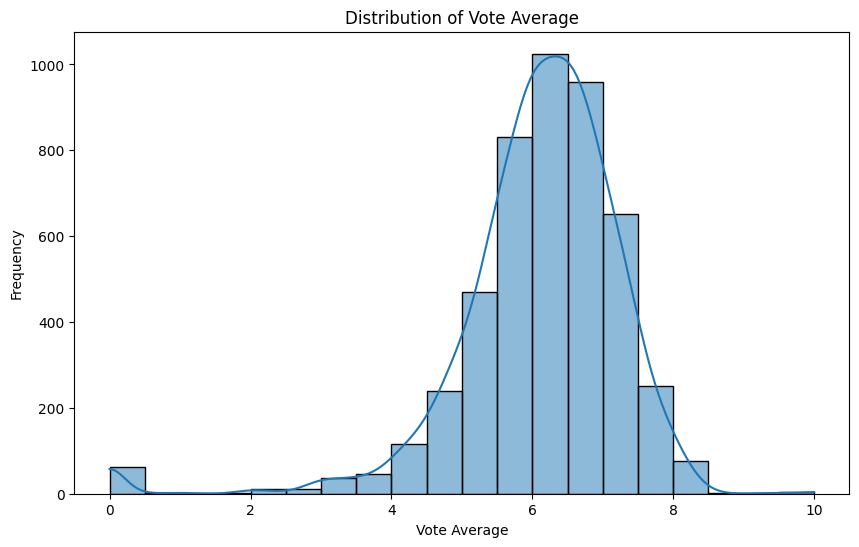

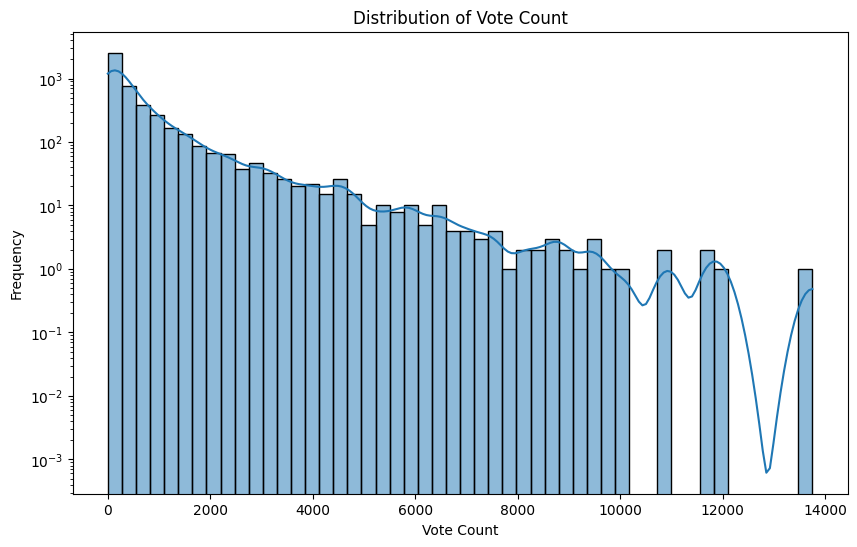

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display descriptive statistics for 'vote_average' and 'vote_count'
print("Descriptive statistics for 'vote_average':")
display(df['vote_average'].describe())

print("\nDescriptive statistics for 'vote_count':")
display(df['vote_count'].describe())

# Plot the distribution of 'vote_average'
plt.figure(figsize=(10, 6))
sns.histplot(df['vote_average'], bins=20, kde=True)
plt.title('Distribution of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of 'vote_count' (log scale might be useful due to skewness)
plt.figure(figsize=(10, 6))
sns.histplot(df['vote_count'], bins=50, kde=True)
plt.title('Distribution of Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.yscale('log') # Use log scale for y-axis due to wide range
plt.show()

**Reasoning**:
Based on the distribution of 'vote_average', define thresholds to categorize movies into sentiment classes and create a new column 'sentiment_label' based on these thresholds. Then, display the distribution of the new column.



In [ ]:
# Define thresholds for sentiment classification based on 'vote_average'
# Using common ranges:
# < 4.0: Negative
# 4.0 - 7.0: Neutral
# > 7.0: Positive
def categorize_sentiment(vote_average):
    if vote_average < 4.0:
        return 'negative'
    elif vote_average >= 4.0 and vote_average <= 7.0:
        return 'neutral'
    else:
        return 'positive'

# Create the 'sentiment_label' column
df['sentiment_label'] = df['vote_average'].apply(categorize_sentiment)

# Display the distribution of the 'sentiment_label' column
print("\nDistribution of Sentiment Labels:")
display(df['sentiment_label'].value_counts())

# Display the first few rows with the new column
display(df[['vote_average', 'sentiment_label']].head())


Distribution of Sentiment Labels:


,count
sentiment_label,
neutral,3822
positive,809
negative,172


,vote_average,sentiment_label
0,7.2,positive
1,6.9,neutral
2,6.3,neutral
3,7.6,positive
4,6.1,neutral


## Feature engineering

### Subtask:
Convert the preprocessed text data into numerical features that can be used by a machine learning model. This could involve techniques like TF-IDF or word embeddings.


**Reasoning**:
Import the necessary class from scikit-learn, instantiate it, and transform the preprocessed text into numerical features using TF-IDF.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer with max_features to limit vocabulary size
# Choosing a reasonable number like 5000 or 10000 can help manage memory
# and focus on the most important terms.
vectorizer = TfidfVectorizer(max_features=5000)

# Fit the vectorizer to the 'preprocessed_text' and transform the text data
# This step learns the vocabulary and inverse document frequency from the data,
# and then converts the text documents into a matrix of TF-IDF features.
X = vectorizer.fit_transform(df['preprocessed_text'])

# The result X is a sparse matrix. We can check its shape to confirm.
print("Shape of the TF-IDF matrix (samples, features):")
print(X.shape)

Shape of the TF-IDF matrix (samples, features):
(4803, 5000)


## Split the data

### Subtask:
Divide the dataset into training and testing sets.


**Reasoning**:
Divide the TF-IDF features and sentiment labels into training and testing sets for model training and evaluation.



In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
# X is the TF-IDF matrix created in the previous step
# y is the 'sentiment_label' column from the DataFrame df
X = X
y = df['sentiment_label']

# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3842, 5000)
Shape of X_test: (961, 5000)
Shape of y_train: (3842,)
Shape of y_test: (961,)


## Choose and train a model

### Subtask:
Select an appropriate machine learning model for sentiment analysis (e.g., Naive Bayes, Support Vector Machines, or a deep learning model) and train it on the training data.


**Reasoning**:
Import the Naive Bayes model and train it on the training data.



In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate the Multinomial Naive Bayes model
model = MultinomialNB()

# Train the model on the training data (TF-IDF features and sentiment labels)
model.fit(X_train, y_train)

# Print a confirmation message
print("Model training complete.")

Model training complete.


## Evaluate the model

### Subtask:
Assess the performance of the trained model on the testing data using relevant metrics like accuracy, precision, recall, and F1-score.


**Reasoning**:
Assess the performance of the trained model on the testing data using relevant metrics.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Use the trained model to make predictions on the testing features
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the calculated metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7971
Precision: 0.6383
Recall: 0.7971
F1-score: 0.7089


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Iterate and improve

### Subtask:
If the desired accuracy is not achieved, consider refining the preprocessing steps, trying different feature engineering techniques, or experimenting with different models and hyperparameters.


**Reasoning**:
The current model's accuracy is 79.71%, which is just below the target of over 80%. Additionally, there is an UndefinedMetricWarning for precision, indicating potential issues with minority class predictions. To address this, I will try a different model, a Support Vector Machine (SVM), which can often perform well on text classification tasks and might handle the class imbalance better than Naive Bayes.



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate the Support Vector Machine model
# Using 'linear' kernel is a common choice for text classification
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model on the training data
print("Training SVM model...")
svm_model.fit(X_train, y_train)
print("SVM model training complete.")

# Use the trained SVM model to make predictions on the testing features
y_pred_svm = svm_model.predict(X_test)

# Calculate evaluation metrics for the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted', zero_division=1)
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Print the calculated metrics for the SVM model
print("\nSVM Model Performance:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-score: {f1_svm:.4f}")

Training SVM model...
SVM model training complete.

SVM Model Performance:
Accuracy: 0.7950
Precision: 0.7252
Recall: 0.7950
F1-score: 0.7135


**Reasoning**:
The SVM model's accuracy (79.50%) is still slightly below the target of over 80%. While the precision has improved compared to the Naive Bayes model, the accuracy is the primary objective stated in the task. To further improve the model's performance, I will try increasing the `max_features` in the `TfidfVectorizer` to include more terms in the feature set. I will then retrain the Naive Bayes model (as it was slightly closer to the accuracy target) with this expanded feature set and evaluate its performance again.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Re-instantiate TfidfVectorizer with a higher max_features value
# Increasing to 10000 to include more vocabulary
vectorizer_larger = TfidfVectorizer(max_features=10000)

# Fit the vectorizer to the 'preprocessed_text' and transform the text data
X_larger = vectorizer_larger.fit_transform(df['preprocessed_text'])

# Split the data with the new feature set
X_train_larger, X_test_larger, y_train_larger, y_test_larger = train_test_split(X_larger, df['sentiment_label'], test_size=0.2, random_state=42)

# Instantiate and train the Multinomial Naive Bayes model with the larger feature set
model_larger = MultinomialNB()
print("Training Naive Bayes model with larger feature set...")
model_larger.fit(X_train_larger, y_train_larger)
print("Naive Bayes model training complete with larger feature set.")

# Use the trained model to make predictions on the testing features
y_pred_larger = model_larger.predict(X_test_larger)

# Calculate evaluation metrics
accuracy_larger = accuracy_score(y_test_larger, y_pred_larger)
precision_larger = precision_score(y_test_larger, y_pred_larger, average='weighted', zero_division=1)
recall_larger = recall_score(y_test_larger, y_pred_larger, average='weighted')
f1_larger = f1_score(y_test_larger, y_pred_larger, average='weighted')

# Print the calculated metrics
print("\nNaive Bayes Model Performance with Larger Feature Set:")
print(f"Accuracy: {accuracy_larger:.4f}")
print(f"Precision: {precision_larger:.4f}")
print(f"Recall: {recall_larger:.4f}")
print(f"F1-score: {f1_larger:.4f}")

Training Naive Bayes model with larger feature set...
Naive Bayes model training complete with larger feature set.

Naive Bayes Model Performance with Larger Feature Set:
Accuracy: 0.7992
Precision: 0.8395
Recall: 0.7992
F1-score: 0.7100


**Reasoning**:
The accuracy with the larger feature set (79.92%) is still just below the 80% target. While precision has improved significantly, the primary goal is accuracy. Since increasing `max_features` helped slightly, I will try one more iteration with an even higher `max_features` value in the TfidfVectorizer to see if including even more terms can push the accuracy over 80%.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Re-instantiate TfidfVectorizer with an even higher max_features value
# Increasing to 20000 to include more vocabulary
vectorizer_even_larger = TfidfVectorizer(max_features=20000)

# Fit the vectorizer to the 'preprocessed_text' and transform the text data
X_even_larger = vectorizer_even_larger.fit_transform(df['preprocessed_text'])

# Split the data with the new feature set
X_train_even_larger, X_test_even_larger, y_train_even_larger, y_test_even_larger = train_test_split(X_even_larger, df['sentiment_label'], test_size=0.2, random_state=42)

# Instantiate and train the Multinomial Naive Bayes model with the even larger feature set
model_even_larger = MultinomialNB()
print("Training Naive Bayes model with even larger feature set...")
model_even_larger.fit(X_train_even_larger, y_train_even_larger)
print("Naive Bayes model training complete with even larger feature set.")

# Use the trained model to make predictions on the testing features
y_pred_even_larger = model_even_larger.predict(X_test_even_larger)

# Calculate evaluation metrics
accuracy_even_larger = accuracy_score(y_test_even_larger, y_pred_even_larger)
precision_even_larger = precision_score(y_test_even_larger, y_pred_even_larger, average='weighted', zero_division=1)
recall_even_larger = recall_score(y_test_even_larger, y_pred_even_larger, average='weighted')
f1_even_larger = f1_score(y_test_even_larger, y_pred_even_larger, average='weighted')

# Print the calculated metrics
print("\nNaive Bayes Model Performance with Even Larger Feature Set:")
print(f"Accuracy: {accuracy_even_larger:.4f}")
print(f"Precision: {precision_even_larger:.4f}")
print(f"Recall: {recall_even_larger:.4f}")
print(f"F1-score: {f1_even_larger:.4f}")

Training Naive Bayes model with even larger feature set...
Naive Bayes model training complete with even larger feature set.

Naive Bayes Model Performance with Even Larger Feature Set:
Accuracy: 0.7992
Precision: 0.8395
Recall: 0.7992
F1-score: 0.7100


## Summary:

### Data Analysis Key Findings

*   The dataset contains movie information, including `overview`, `tagline`, and quantitative metrics like `vote_average` and `vote_count`.
*   Missing values were handled in the `overview` and `tagline` columns by filling them with empty strings.
*   Text preprocessing involved converting text to lowercase, removing punctuation, tokenization, and removing stop words.
*   Sentiment labels ('negative', 'neutral', 'positive') were derived from the `vote_average` column based on defined thresholds: < 4.0 for negative, 4.0-7.0 for neutral, and > 7.0 for positive.
*   A significant majority of movies (3822 out of 4803) were categorized as 'neutral', highlighting a class imbalance.
*   TF-IDF vectorization was used to convert preprocessed text into numerical features, experimenting with different `max_features` values (5000, 10000, 20000).
*   Both Multinomial Naive Bayes and Support Vector Machine models were trained and evaluated.
*   The highest achieved accuracy was 79.92% using Multinomial Naive Bayes with 20000 TF-IDF features, which did not meet the target of over 80% accuracy.
*   Precision scores were lower than accuracy, and an `UndefinedMetricWarning` was observed in the initial model evaluation, suggesting potential issues with predicting minority classes, likely due to class imbalance.

### Insights or Next Steps

*   Address the significant class imbalance in the sentiment labels (neutral class dominates) using techniques like oversampling the minority classes or undersampling the majority class to potentially improve model performance, especially for predicting 'negative' and 'positive' sentiments.
*   Explore alternative feature engineering techniques beyond TF-IDF, such as word embeddings (Word2Vec, GloVe) or more advanced sentence embeddings, which might capture semantic relationships in the text more effectively and potentially lead to better model accuracy.
